# 4) XGBoost

Good tutorial xgboost:
    
https://www.datacamp.com/community/tutorials/xgboost-in-python

### 4.) Load and prepare data for algorithm:

In [63]:
#import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


import seaborn as sns

In [45]:
#import file with features:
xgbdata = pd.read_csv("df_features.csv")
xgbdata.head(5)

,class,sms,length,sw_count,sc_count,hyperlink,digit_count,phone,smileys,weeb,upper_case
0,0,"Go until jurong point, crazy.. Available only ...",111,32,8,False,0,False,0,False,3
1,0,Ok lar... Joking wif u oni...,29,6,6,False,0,False,0,False,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,43,1,False,25,True,0,False,10
3,0,U dun say so early hor... U c already then say...,49,17,6,False,0,False,0,False,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,18,0,False,0,False,0,False,2


In [46]:
#change False to 0 and True to 1:
#define function:
def bool_to_bin(colname):
    index_false = xgbdata.loc[:,colname]==False
    xgbdata.loc[index_false,colname]=0
    xgbdata.loc[-index_false,colname]=1

bool_to_bin("hyperlink")
bool_to_bin("phone")
bool_to_bin("weeb")

xgbdata.head(5)

,class,sms,length,sw_count,sc_count,hyperlink,digit_count,phone,smileys,weeb,upper_case
0,0,"Go until jurong point, crazy.. Available only ...",111,32,8,0,0,0,0,0,3
1,0,Ok lar... Joking wif u oni...,29,6,6,0,0,0,0,0,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,43,1,0,25,1,0,0,10
3,0,U dun say so early hor... U c already then say...,49,17,6,0,0,0,0,0,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,18,0,0,0,0,0,0,2


In [47]:
#separate data in target and predictor variables:
X = xgbdata.iloc[:,2:]
y = xgbdata.iloc[:,0]

#transform into Dmatrix (faster and supported by xgboost):
dmatrix = xgb.DMatrix(data=X,label=y)

In [48]:
#make train test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)
#set seed in order to be able to reproduce results

### 4. Train model:

In [49]:
#generate classifier:
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [50]:
#make prediction:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### 4. Evaluate model:

In [51]:
#TRAIN ERROR:
y_pred = xg_reg.predict(X_train)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy1 = accuracy_score(y_train, predictions)
print("Accuracy for training: %.2f%%" % (accuracy1 * 100.0))

log_loss(y_train, y_pred)

Accuracy for training: 97.33%


0.27437179970564823

In [52]:
#TEST ERROR:
y_pred = xg_reg.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy2 = accuracy_score(y_test, predictions)
print("Accuracy for test set: %.2f%%" % (accuracy2 * 100.0))

log_loss(y_test, y_pred)


Accuracy for test set: 97.76%


0.27063848068895896

0.9891220391349125


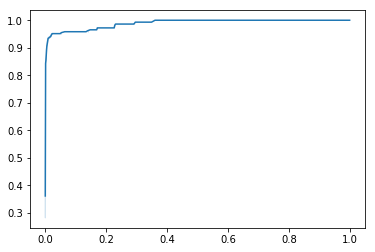

In [64]:
#plot area under the curve:
roc = roc_curve(y_test,y_pred)
x = roc[0]
y = roc[1]
sns.lineplot(x,y)
print(roc_auc_score(y_test,y_pred))

In [41]:
%%capture
#CROSS VALIDATION 
params={"max_depth":5, "min_child_weight":2, "eta": 0.1, "subsamples":0.9, "colsample_bytree":0.8, "objective" : "binary:logistic", "eval_metric": ["error","logloss"]}
rounds = 200

result = xgb.cv(params=params, dtrain=dmatrix, num_boost_round=rounds, as_pandas=True, seed=10,early_stopping_rounds=50)
#early_stopping_rounds=50
accuracy3 = 1-result.mean()["test-error-mean"]

In [40]:
print("Accuracy for cross-validation: %.2f%%" % (accuracy3 * 100.0))
print("Logloss for cross-validation:",result["test-logloss-mean"])

Accuracy for cross-validation: 98.29%
Logloss for cross-validation: 0     0.604673
1     0.532469
2     0.472683
3     0.424550
4     0.380728
5     0.343332
6     0.310854
7     0.282207
8     0.258210
9     0.236078
10    0.216671
11    0.199650
12    0.184656
13    0.171398
14    0.159600
15    0.149223
16    0.139784
17    0.131361
18    0.123856
19    0.117313
20    0.111391
21    0.106163
22    0.101300
23    0.096942
24    0.093158
25    0.089778
26    0.086648
27    0.083984
28    0.081543
29    0.079265
        ...   
51    0.060718
52    0.060536
53    0.060223
54    0.059953
55    0.059642
56    0.059452
57    0.059166
58    0.059072
59    0.059038
60    0.058940
61    0.058718
62    0.058586
63    0.058448
64    0.058276
65    0.058159
66    0.058027
67    0.057943
68    0.057932
69    0.057976
70    0.058002
71    0.057884
72    0.057743
73    0.057773
74    0.057673
75    0.057645
76    0.057663
77    0.057569
78    0.057525
79    0.057525
80    0.057504
Name: test-loglos

In [30]:
result
#result.mean()["test-error-mean"]
result["test-logloss-mean"]
result

,train-error-mean,train-error-std,train-logloss-mean,train-logloss-std,test-error-mean,test-error-std,test-logloss-mean,test-logloss-std
0,0.016685,0.001336,0.604181,0.000332,0.021169,0.001982,0.604673,0.000372
1,0.017582,0.001649,0.531433,0.000573,0.021888,0.001982,0.532469,0.000526
2,0.016326,0.001543,0.470978,0.000655,0.020452,0.002447,0.472683,0.001064
3,0.015429,0.001842,0.422275,0.002385,0.017940,0.001776,0.424550,0.003072
4,0.015429,0.001287,0.378047,0.001933,0.019376,0.003488,0.380728,0.002900
5,0.015429,0.001084,0.340226,0.002010,0.019914,0.003169,0.343332,0.003136
6,0.015339,0.001372,0.307407,0.002047,0.019376,0.003169,0.310854,0.002646
7,0.014173,0.001413,0.278461,0.001960,0.018658,0.002991,0.282207,0.002710
8,0.014173,0.001790,0.254297,0.000775,0.018299,0.002197,0.258210,0.003302
9,0.014352,0.001496,0.231885,0.000848,0.019734,0.000915,0.236078,0.003339


### 4. Test on unseen SMS

In [31]:
#invent 2 non-spam sms (easy and difficult):
sms1_non_spam = "Hey man, how you doin???"
sms2_non_spam = "Hello Eric, here's my phone number: +33 661 29 77 66"
#invent 2 spam sms (easy and difficult):
sms1_spam = "CONGRATULATIONS, you won at the lottery! All you need to do is call us on the following number: +33 72 36 54 28. Or you can visit www.youwonlottery.com"
sms2_spam = "What a time to be alive! You can now buy the new Ray Ban sunglasses at a discount rate of -50%. Reply with -I want 50% off-"


### 4. Weaknesses and strengths of model:

early stopping to avoid overfitting??

https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

In [32]:

eval_set = [(X_train, y_train), (X_test, y_test)]
xg_reg.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)


results = xg_reg.evals_result()
print(results)

[0]	validation_0-error:0.01996	validation_1-error:0.019731
[1]	validation_0-error:0.023772	validation_1-error:0.019731
[2]	validation_0-error:0.020184	validation_1-error:0.01704
[3]	validation_0-error:0.020857	validation_1-error:0.01704
[4]	validation_0-error:0.020408	validation_1-error:0.016143
[5]	validation_0-error:0.021978	validation_1-error:0.01704
[6]	validation_0-error:0.023548	validation_1-error:0.018834
[7]	validation_0-error:0.025118	validation_1-error:0.022422
[8]	validation_0-error:0.025118	validation_1-error:0.021525
[9]	validation_0-error:0.026688	validation_1-error:0.022422
{'validation_0': {'error': [0.01996, 0.023772, 0.020184, 0.020857, 0.020408, 0.021978, 0.023548, 0.025118, 0.025118, 0.026688]}, 'validation_1': {'error': [0.019731, 0.019731, 0.01704, 0.01704, 0.016143, 0.01704, 0.018834, 0.022422, 0.021525, 0.022422]}}


In [33]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

ImportError: You must install graphviz to plot tree